## Stock prediction with scikit-learn ( NVIDIA Corporation Stocks )

### Import dependecies 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
#### import data ####

# import data from a csv  download on https://finance.yahoo.com
#NVDA_df = pd.read_csv("NVDA.csv")

# Or import data directly from yahoo with  pandas_datareader
import datetime
import pandas_datareader.data as web
start = datetime.datetime(2017, 9, 6)
end = datetime.datetime(2019, 9, 6)
df = web.DataReader("NVDA", 'yahoo', start, end)

###  Visualize the data 


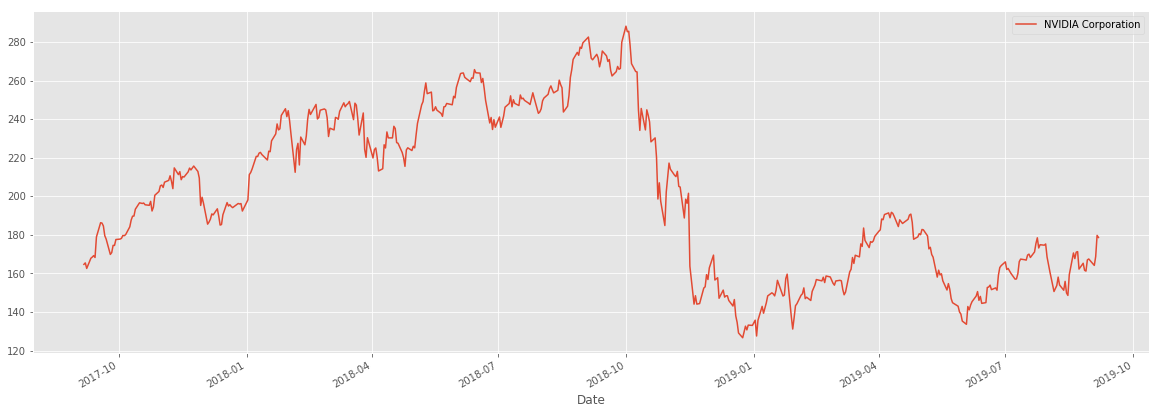

In [3]:
#plot data
mpl.rc('figure', figsize=(20, 7))
mpl.__version__
mpl.style.use('ggplot')
df['Adj Close'].plot(label='NVIDIA Corporation')
plt.legend()

### Prepare the data for modelling

In [4]:
# A variable for predicting 'n' days out into the future
forecast_out = 30

In [5]:
#### create a new dataframe with  10 % rows remove for  train and test our model  our  model we will use the 
# removed data for compare it predictions with the reality ( we don't use it in training to avoid overfitting)

df2 = df[0:int(len(df)//1.1)].copy()  # create a new dataframe without the early
#10 % of the data for training and validation
df3 = df[(int(len(df)//1.1)-forecast_out):-forecast_out].copy() # create a new dataframe
#with 10 % of the early data for prediction part
df4 = df[int(len(df)//1.1):].copy() # create a new dataframe
#with 10 % of the data for plot the  prediction part

In [6]:
#Create another column (the target ) shifted 'n' units up
df2['target'] = df2[['Adj Close']].shift(-forecast_out)

In [7]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df2.drop(['target'],1))
#Remove the last '30' rows
X = X[:-forecast_out]

In [8]:
# Create the independent data set (X predict) for test the model with the 10% data removed
X_predict = np.array(df3)

In [9]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df2['target'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]

In [10]:
# Split the data into 80% training and 20% validation
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Linear Model

In [11]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Validation Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.5510140832530479


In [13]:
#linear regression model predictions for the next '30' days
lr_prediction = lr.predict(X_predict)


In [14]:
#Create another column (the prediction)  in df4 for ploting
df4['predictionlinear'] = lr_prediction

###  Lasso

In [15]:
clfLasso=Lasso(alpha=8.0)
clfLasso.fit(x_train, y_train)

Lasso(alpha=8.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
# Validation Model
clfLasso_confidence = clfLasso.score(x_test, y_test)
print("clfLasso confidence: ",clfLasso_confidence)

clfLasso confidence:  0.4580495776337731


In [17]:
#linear regression model predictions for the next '30' days
clfLasso_prediction = clfLasso.predict(X_predict)

In [18]:
#Create another column (the prediction)  in df4 for ploting
df4['predictionclfLasso'] = clfLasso_prediction

### RandomForestRegressor

In [19]:
clfrfr= RandomForestRegressor()
clfrfr.fit(x_train, y_train)

/Users/perso/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
# Validation Model
clfrfr_confidence = clfrfr.score(x_test, y_test)
print("clfrfr confidence: ",clfrfr_confidence)

clfrfr confidence:  0.5332405006559349


In [21]:
#linear regression model predictions for the next '30' days
clfrfr_prediction = clfrfr.predict(X_predict)

In [22]:
#Create another column (the prediction)  in df4 for ploting
df4['predictionclfrfr'] = clfrfr_prediction

### plot data

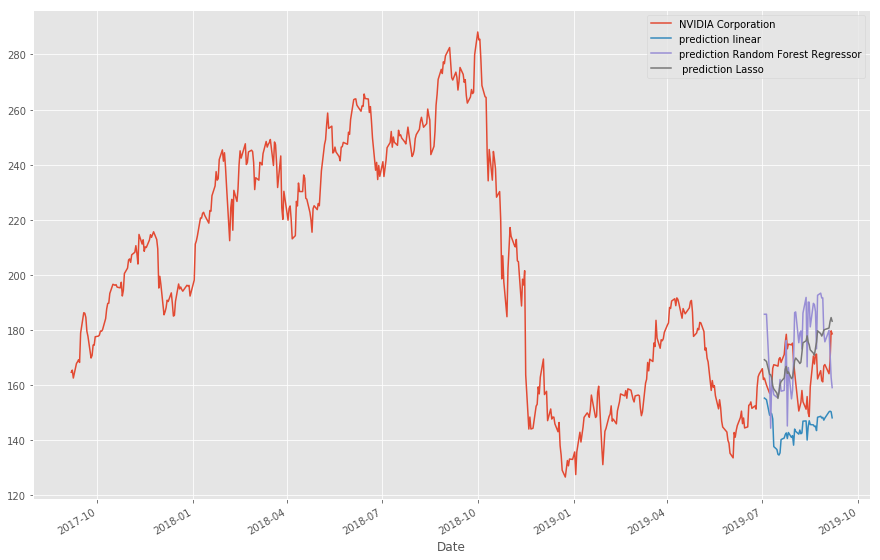

In [23]:
#plot data
mpl.rc('figure', figsize=(15, 10))
mpl.__version__
mpl.style.use('ggplot')
df['Adj Close'].plot(label='NVIDIA Corporation')
df4['predictionlinear'].plot(label='prediction linear')
df4['predictionclfrfr'].plot(label='prediction Random Forest Regressor')
df4['predictionclfLasso'].plot(label=' prediction Lasso')
plt.legend()